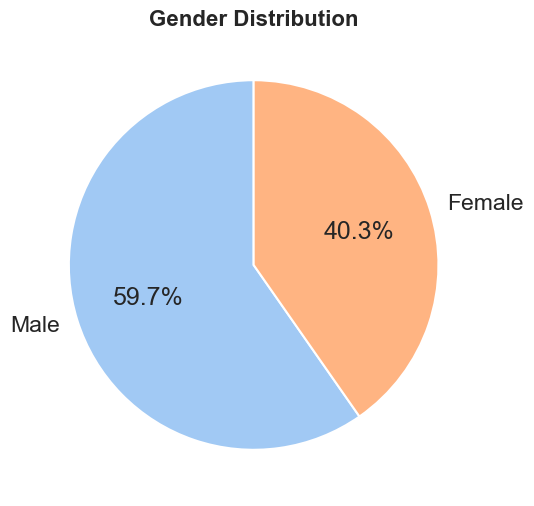

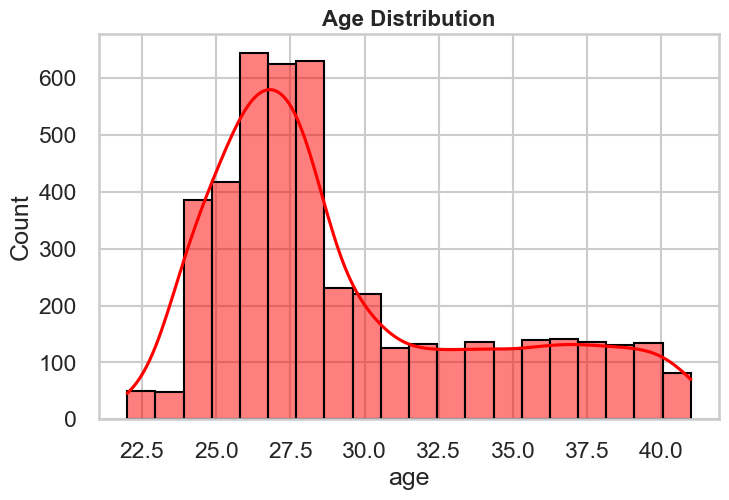

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file directly from GitHub
file_path = "https://raw.githubusercontent.com/sachin1082/Employee_data_analysis_repo/main/employee_data.xlsx"
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Fill missing values (numeric)
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values (categorical)
for col in df.select_dtypes(include="object").columns:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])

# Convert hire_date if present
if "hire_date" in df.columns:
    df["hire_date"] = pd.to_datetime(df["hire_date"], errors="coerce")
    df["tenure_years"] = ((pd.Timestamp.today() - df["hire_date"]).dt.days / 365).fillna(0).round(1)

# Visualization style
sns.set(style="whitegrid", palette="Set2", context="talk")

# 1. Employees per department
if "department" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x="department", order=df["department"].value_counts().index)
    plt.title("Employees per Department", fontsize=16, fontweight="bold")
    plt.xticks(rotation=30)
    plt.show()

# 2. Salary distribution
if "monthly_income" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["monthly_income"], bins=30, kde=True, color="skyblue", edgecolor="black")
    plt.title("Income Distribution", fontsize=16, fontweight="bold")
    plt.show()

# 3. Salary by department (boxplot)
if "monthly_income" in df.columns and "department" in df.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x="department", y="monthly_income")
    plt.title("Salary by Department", fontsize=16, fontweight="bold")
    plt.xticks(rotation=30)
    plt.show()

# 4. Performance vs Income
if {"performance_score","monthly_income","department"}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x="performance_score", y="monthly_income", hue="department", alpha=0.7)
    plt.title("Performance vs Income", fontsize=16, fontweight="bold")
    plt.show()

# 5. Gender distribution (pie chart)
if "gender" in df.columns:
    gender_counts = df["gender"].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
    plt.title("Gender Distribution", fontsize=16, fontweight="bold")
    plt.show()

# 6. Attrition by Department (stacked bar)
if {"attrition","department"}.issubset(df.columns):
    attrition_dept = df.groupby(["department","attrition"]).size().unstack(fill_value=0)
    attrition_dept.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Paired", edgecolor="black")
    plt.title("Attrition by Department", fontsize=16, fontweight="bold")
    plt.xticks(rotation=30)
    plt.show()

# 7. Age distribution (histogram)
if "age" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["age"], bins=20, kde=True, color="red", edgecolor="black")
    plt.title("Age Distribution", fontsize=16, fontweight="bold")
    plt.show()